### 1. Copy the code below into a jupyter notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

### 2. For df1:

- Take a look at the data in df1.
- Does x increase from time one to time two?
- Visualize the relationship between x and time.
- Run a statistical test to further examine the relationship between these features.

In [2]:
df1.shape

(200, 3)

In [3]:
df1

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
...,...,...,...
195,b,9.308194,two
196,a,3.931530,two
197,a,3.385066,two
198,b,8.247980,two


In [4]:
df1.isnull().sum()

group    0
x        0
time     0
dtype: int64

In [5]:
df1.group

0      a
1      a
2      a
3      a
4      a
      ..
195    b
196    a
197    a
198    b
199    b
Name: group, Length: 200, dtype: object

### 3. For df2:

- Take a look at the data in df2.
- Visualize the relationship between x and y.
- How would you describe the relationship between x and y?
- Run a statistical test to examine the relationship between x and y.

In [6]:
df2

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a
...,...,...,...
195,109.263191,647.120801,d
196,108.898932,640.437291,d
197,109.539255,629.554555,d
198,105.879511,647.396688,d


In [7]:
df1.isnull().sum()

group    0
x        0
time     0
dtype: int64

### 4. For df3:

- Take a look at the data in df3
- Which surgeon has the higher success rate?
- If you had to have heart bypass surgery, which surgeon should you go to?

In [8]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

In [9]:
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

In [10]:
df3.surgeon.value_counts()

B    520
A    480
Name: surgeon, dtype: int64

In [11]:
df3.groupby(['surgeon', 'surgery']).success.size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
Name: success, dtype: int64

### 5. For df1 and df2, what happens to the relationships if you take into account the group feature?

In [12]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

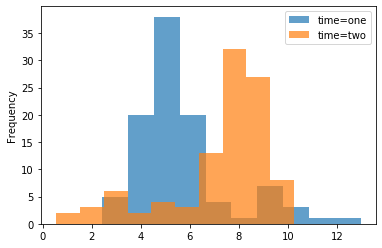

In [13]:
ax = df1[df1.time == 'one'].x.plot.hist(label='time=one', alpha=.7)
df1[df1.time == 'two'].x.plot.hist(label='time=two', ax=ax, alpha=.7)
ax.legend()

In [14]:
df1.groupby(['group', 'time']).x.mean()

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [15]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [16]:
df1.groupby(['group', 'time']).size()

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64

[Text(0.5, 1.0, 'Time two')]

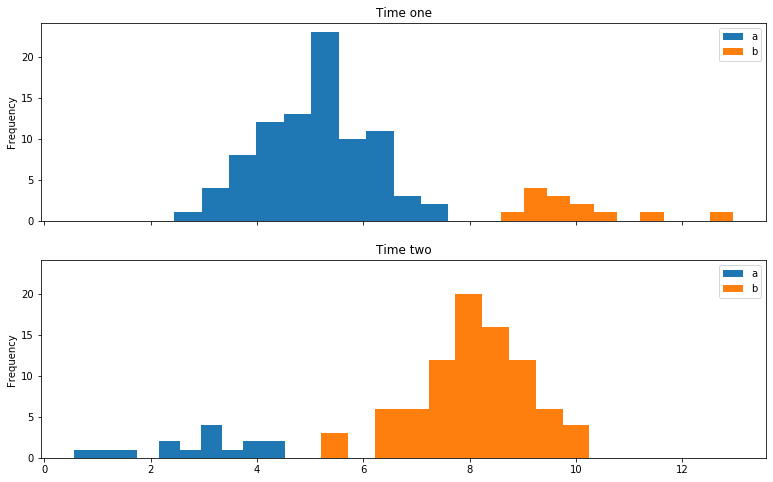

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df1.query('group == "a" & time == "one"').x.plot.hist(ax=ax1, label='a')
df1.query('group == "b" & time == "one"').x.plot.hist(ax=ax1, label='b')
ax1.set(title='Time one')
ax1.legend()
df1.query('group == "a" & time == "two"').x.plot.hist(ax=ax2, label='a')
df1.query('group == "b" & time == "two"').x.plot.hist(ax=ax2, label='b')
ax2.legend()
ax2.set(title='Time two')

p = 1.3960403186191819e-18


[Text(0.5, 1.0, 'r = 0.5694')]

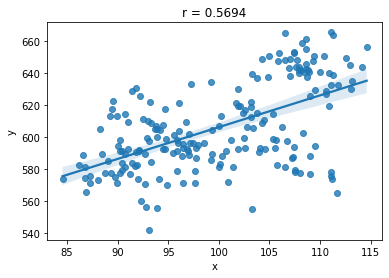

In [18]:
r, p = stats.pearsonr(df2.x, df2.y)
print('p =', p)
ax = sns.regplot(data=df2, y='y', x='x')
ax.set(title=f'r = {r:.4f}')

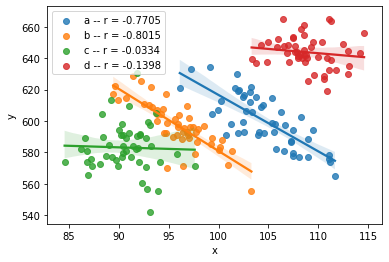

In [19]:
for group, subset in df2.groupby('group'):
    r, p = stats.pearsonr(subset.x, subset.y)
    sns.regplot(data=subset, x='x', y='y', label=f'{group} -- r = {r:.4f}')
plt.legend()